# Zoiberg-2.0 Bootstrap


In [48]:
# Just to make sure my RAM doesn't explode, clears all variables in memory
%reset

## Imports

---


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Take a small percentage of data to speed up tests !
PERCENTAGE_OF_DATA = 1 / 100

In [51]:
df_train = pd.read_csv('./mnist_train.csv', header=None)
df_test = pd.read_csv('./mnist_test.csv', header=None)
df_train = df_train.iloc[:int(df_train.shape[0] * PERCENTAGE_OF_DATA),:]
df_test = df_test.iloc[:int(df_test.shape[0] * PERCENTAGE_OF_DATA),:]

In [52]:
print(f'Train set shape: {df_train.shape}')
print(f'Test set shape: {df_test.shape}')
df_train.head()
# df_test.head()

Train set shape: (600, 785)
Test set shape: (100, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df_train = df_train.rename(columns={0: 'digit'})
df_test = df_test.rename(columns={0: 'digit'})

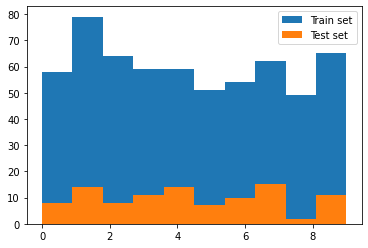

In [54]:
plt.hist(df_train['digit'], label='Train set')
plt.hist(df_test['digit'], label='Test set')
plt.legend()

In [55]:
def show_image(n_image):
    pixels = df_train.drop('digit', axis=1).iloc[n_image].values
    img = np.reshape(pixels, (28, 28))
    plt.imshow(img, cmap='plasma')


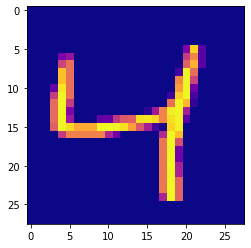

In [56]:
show_image(2)

In [57]:
df_train['digit'].describe()

count    600.000000
mean       4.350000
std        2.922054
min        0.000000
25%        2.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: digit, dtype: float64

In [58]:
pd.concat([
    df_train['digit'].value_counts().sort_index().rename('Train'),
    df_test['digit'].value_counts().sort_index().rename('Test')
],
          axis=1)


,Train,Test
0,58,8
1,79,14
2,64,8
3,59,11
4,59,14
5,51,7
6,54,10
7,62,15
8,49,2
9,65,11


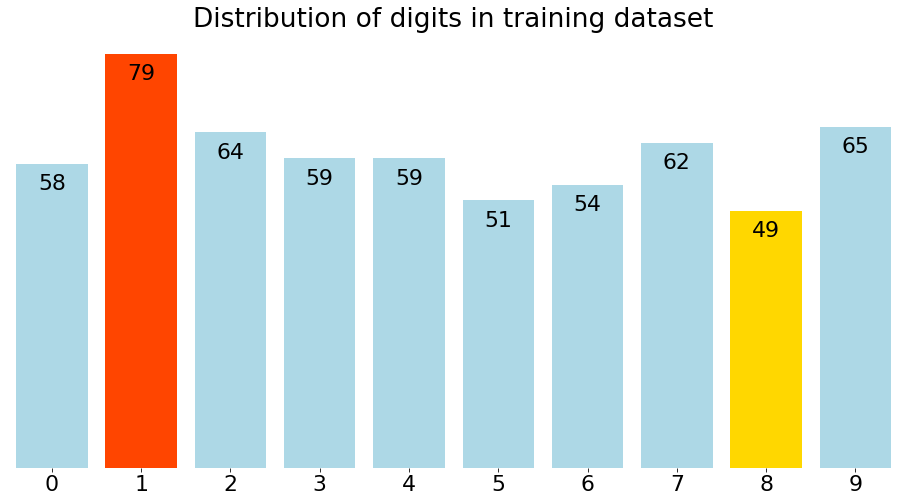

In [59]:
plt.rcParams.update({'font.size': 22})
fig1 = plt.figure(figsize=(16, 8))
hist = sns.countplot(data=df_train, x='digit', saturation=1, color='lightblue')
# you can search color picker in google, and get hex values of you fav color

patch_h = [patch.get_height() for patch in hist.patches]
# patch_h contains the heights of all the patches now

idx_tallest = np.argmax(patch_h)
idx_smallest = np.argmin(patch_h)
# np.argmax return the index of largest value of the list

hist.patches[idx_tallest].set_facecolor('orangered')
hist.patches[idx_smallest].set_facecolor('gold')
hist.bar_label(hist.containers[0], padding=-30)
hist.set_title('Distribution of digits in training dataset')
hist.set_frame_on(False)
hist.get_yaxis().set_visible(False)
hist.set_xlabel('')

plt.rcParams.update({'font.size': 10})


In [60]:
fig1.add_axes(hist)
# fig1.savefig('graphs/digit_distribution_train_set.png', facecolor='white')

<AxesSubplot:title={'center':'Distribution of digits in training dataset'}, ylabel='count'>

## Predictions

---


In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve, learning_curve, GridSearchCV

In [62]:
model = KNeighborsClassifier()

In [63]:
y_train = df_train['digit']
X_train = df_train.drop('digit', axis=1)
y_test = df_test['digit']
X_test = df_test.drop('digit', axis=1)

In [64]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [65]:
print(f'Train score: {model.score(X_train, y_train)}')
print(f'Test score: {model.score(X_test, y_test)}')

Train score: 0.8916666666666667
Test score: 0.81


In [66]:
model = KNeighborsClassifier()
k = np.arange(1, 50)

# WARNING: this line takes forever to compile, maybe reduce the sample size to speed up the process ?
train_score, val_score = validation_curve(model,
                                          X_train,
                                          y_train,
                                          param_name='n_neighbors',
                                          param_range=k,
                                          cv=5)


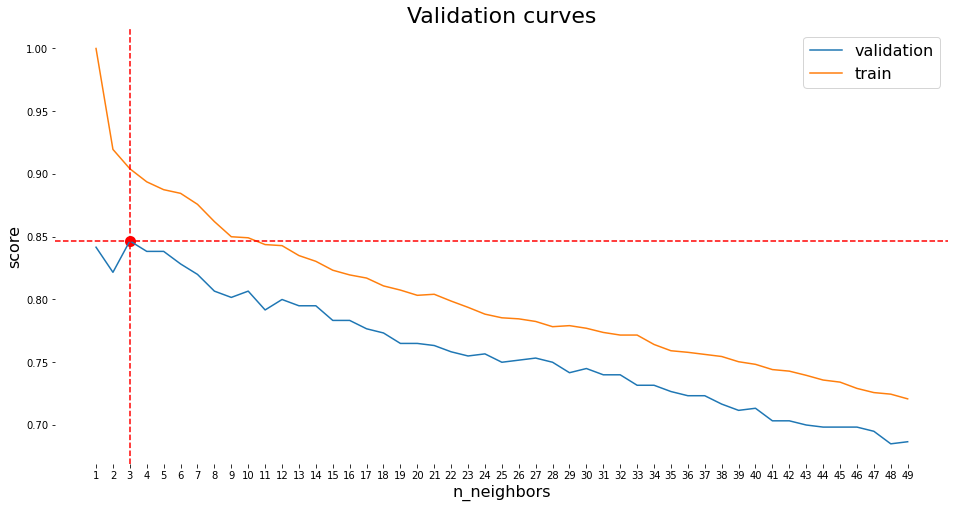

In [67]:
val_score_mean = val_score.mean(axis=1)

plt.figure(figsize=(16, 8))
plt.title('Validation curves', fontsize=22)
plt.box(False)
plt.plot(k, val_score_mean, label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')
plt.axhline(val_score_mean.max(), c='red', linestyle='--')
plt.axvline(val_score_mean.argmax() + 1, c='red', linestyle='--')
plt.scatter(val_score_mean.argmax() + 1,
            val_score_mean.max(),
            c='red',
            linewidths=5)
plt.xticks(k)

plt.xlabel('n_neighbors', fontsize=16)
plt.ylabel('score', fontsize=16)
plt.legend(fontsize=16)
# plt.savefig('graphs/validation_curves.png', facecolor='white')

In [68]:
model = KNeighborsClassifier(3)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.82

In [69]:
N, train_score, val_score = learning_curve(model,
                                           X_train,
                                           y_train,
                                           train_sizes=np.linspace(.1, 1, 10),
                                           cv=5)


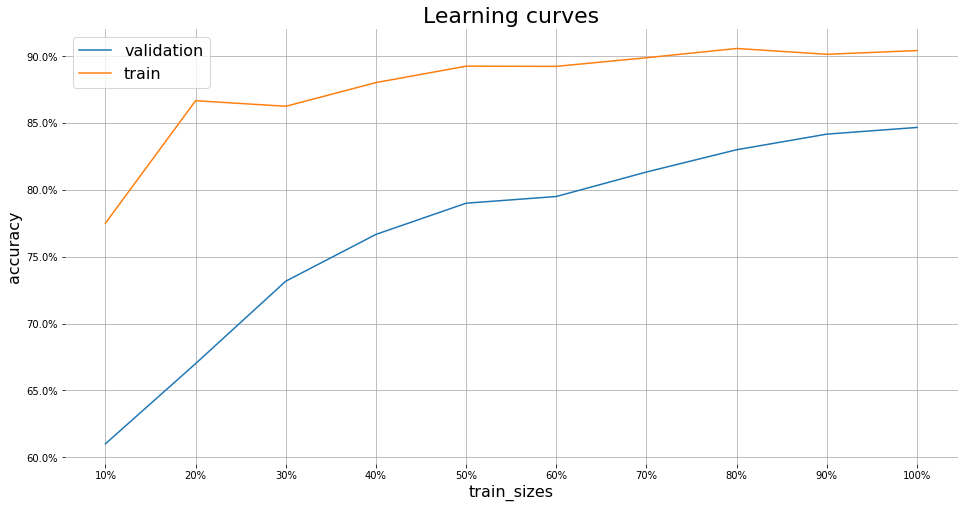

In [70]:
import matplotlib.ticker as mtick

fig = plt.figure(figsize=(16, 8))
ax = plt.subplot()

ax.plot(np.linspace(.1, 1, 10), val_score.mean(axis=1), label='validation')
ax.plot(np.linspace(.1, 1, 10), train_score.mean(axis=1), label='train')

ax.set_title('Learning curves', fontsize=22)
ax.set_xlabel('train_sizes', fontsize=16)
ax.set_ylabel('accuracy', fontsize=16)
ax.set_xticks(np.linspace(.1, 1, 10))
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.legend(fontsize=16)

ax.set_frame_on(False)
ax.grid()

# fig.savefig('graphs/learning_curves.png', facecolor='white')

In [71]:
param_grid = {
    'n_neighbors': np.arange(1, 5),
    'metric': ['euclidean', 'manhattan']
}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([1, 2, 3, 4])})

In [72]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.82

<center>
  <img src="./assets/accuracy.png" alt="Accuracy" width=728 height=454>
  <h4><i>Accuracy definition</i></h4>
</center>


## Questions

---


### 1. _Why use a separate dataset to measure the performance of an algorithm?<br> What are the results you get when you test your algorithm on the same dataset used in training?_


It's important to separate the dataset into two groups:

- the **train** set, to train our model
- the **test** set, to evaluate the performance of our model

If we don't do that and test our algorithm on the same dataset used in training, we would get an inaccurate evaluation of the performance of our model, since it has already seen all of the data. The idea behind the test set is to confront and evaluate our model on real life data, or at least on data that the model had not seen before.


### 2. _What are bias and variance?<br> What do they measure?<br> Which values should they take?_


**Bias** is the difference between the average prediction of our model and the correct value which we are trying to predict. Model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data.

**Variance** is the variability of model prediction for a given data point or a value which tells us spread of our data. Model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before. As a result, such models perform very well on training data but has high error rates on test data.

<center>
  <img src="./assets/bias_and_variance.png" alt="Bias and variance">
  <h4><i>Bias and variance</i></h4>
  <img src="./assets/bias_variance_balance.png" alt="Bias and variance balance">
  <h4><i>Bias and variance balance</i></h4>
</center>

### *3. What is cross validation?<br>What are the main advantages?<br>When can I use it?*

Cross-validation is a statistical technique for assessing the effectiveness of machine learning models, particularly in cases where we need to mitigate overfitting. It is also of use in determining the hyper parameters of machine learning models, in the sense that which parameters will result in lowest test error.

The only possible drawback of this method is that as we gain robustness by increasing the number of splits, we also have to train more model — a potentially tedious and expensive process.

### *4. Can you explain why it’s important to normalize (i.e. scale) the data when using algorithms like KNN?<br>Is it necessary in our specific study case?*